# Introduction to NumPy


[Numpy documentation](https://numpy.org/doc/stable/)


NumPy is the most used library for scientific computing. It is well-optimized and easy-to-use and offers e.g. linear algebra routines and comprehensive mathematical functions.

In [1]:
# imports for this lesson
import time
import numpy as np
import matplotlib.pyplot as plt

## Arrays

An array is a 'grid' of values of the same types. It is indexed by tuples of non negative indices and provides the framework for multiple dimensions. Each array has the following:
- `dtype`, data type. If not expressed, then the data type of the array is the minimum type required to hold the objects in the sequence. 
- `shape`, shape of the data as a tuple. For example, a $3 \times 4$ matrix has shape $(3,4)$.
- `data`, raw data storage in memory.

### Arrays vs lists

In [22]:
length = 100000000
a = list(range(length))
b = [ 0 ] * length

In [33]:
# square of a list
tic = time.time()
for i in range(len(a)):
  b[i] = a[i]**2
toc = time.time()
print(f"Elapsed time: {toc - tic}")

Elapsed time: 5.800724744796753


In [39]:
# np array of the arithmetic sequence of numbers from 0 to length
# with step 1
a_np = np.arange(length)
b_np = np.zeros(length)

In [34]:
# square of an array
tic = time.time()
b_np = a_np ** 2
toc = time.time()
print(f"Elapsed time: {toc - tic}")

Elapsed time: 0.18929457664489746


### Creating arrays

In [38]:
# 1-dimensional array of length 3
a = np.array([1,2,3])
# 2-dimensional array of shape (2,3) -> 3x4 matrix
b = np.array([[1,2,3], [4,5,6]])
print(f"a={a}")
print(f"b={b}")

a=[1 2 3]
b=[[1 2 3]
 [4 5 6]]


In [61]:
# zero array
zero = np.zeros((3,4))
zero

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [62]:
# be careful on data types :)
print(zero.dtype)
zero = np.zeros((3,4), dtype = np.int64)
print(zero.dtype)

float64
int64


In [46]:
# ones array
one = np.ones((2,5))
one

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [47]:
# identity matrix
identity = np.eye(5)
identity

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Basic operations

In [56]:
# compute the shape
print(f"Shape: {one.shape}")
# compute the size, i.e. the number of entries
print(f"Size: {one.size}")
# compute the number of dimensions: e.g. for a vector is 1, for a matrix 2
print(f"Number of dimensions: {one.ndim}")
# compute the data type
print(f"Data type: {one.dtype}")

Shape: (2, 5)
Size: 10
Number of dimensions: 2
Data type: float64


In [68]:
# sum
a = np.array([1,2,3])
b = np.array([4,5,6])
# alternative: np.add
a + b

array([5, 7, 9])

In [69]:
# subtraction
# alternative: np.subtract
a - b

array([-3, -3, -3])

In [70]:
# multiplication (component-wise)
# alternative: np.multiply
a*b

array([ 4, 10, 18])

In [71]:
# division (component-wise)
# alternative: np.divide
a/b

array([0.25, 0.4 , 0.5 ])

In [74]:
# transpose
a = np.array([[1,2,3], [4,5,6]])
print(a)
# more general alternative: np.transpose
a.T

[[1 2 3]
 [4 5 6]]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [75]:
# mean
np.mean(b)

5.0

## Linear Algebra with NumPy

NumPy is perfect for performing linear algebra computations. Some of the most useful routines are the following.
- `@`: matrix-multiplication of two arrays. 
- `np.dot`: compute the dot product of two arrays.
- `np.linalg.norm`: compute the vector or matrix norm.
- `np.linalg.solve`: solve a system of linear equations. 
- `np.linalg.inv`: compute the inverse of a matrix

For a matrix-matrix multiplication it can also be used `np.dot` but `@` is preferred: see [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot).

In [81]:
# matrix-vector product
M = np.ones((3,2), dtype = np.int64)
a = np.ones(2, dtype = np.int64)
M @ a

array([2, 2, 2])

In [86]:
# matrix-matrix product
M @ M.T

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [89]:
# dot product
# alternative for vectors: np.vdot()
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [92]:
# norm
np.linalg.norm(a)

3.7416573867739413

In [97]:
# linear-system solve
A = np.array([[1,2], [0, 1]])
b = np.array([3,4])
x = np.linalg.solve(A,b)
print(f"The solution of the system Ax = b is: {x}")

The solution of the system Ax = b is: [-5.  4.]


In [98]:
# solution check
A @ x

array([3., 4.])

In [100]:
# inverse of a matrix
A = np.array([[1,2], [0, 1]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1., -2.],
       [ 0.,  1.]])

In [101]:
# inverse check
A @ A_inv

array([[1., 0.],
       [0., 1.]])

## Examples

### 1. Approximations of $\pi$

#### 1.1 Monte Carlo approximation of $\pi$

In [27]:
def MonteCarloPi(num_sample):
    """ Implement the Monte Carlo method to approximate pi.

    Args:
        num_sample (int): number of (x,y) samples.
    """
    
    # a square needed for the plot
    square_x = np.array([1,-1,-1,1,1])
    square_y = np.array([1,1,-1,-1,1])

    # generate vector of angles in degree
    theta_degree = np.arange(361)
    # formula to pass from degree to radiant
    theta_radiant = np.pi*theta_degree/180
    # a cirle needed for the plot
    circle_x = np.cos(theta_radiant)
    circle_y = np.sin(theta_radiant)

    # generate random (x,y) samples in [0,1)^2
    random_x = np.random.rand(num_sample)
    random_y = np.random.rand(num_sample)
    # center them in [-1,1)^2
    x = 2*random_x - 1
    y = 2*random_y - 1

    # distance from the center
    r = x**2+y**2
    # count the points inside the circle
    num_inside = np.sum(r<=1)
    # get coordinates of inside and outside points for the plot
    x_inside = x[r<=1]
    y_inside = y[r<=1]
    x_outside = x[r>1]
    y_outside = y[r>1]

    # estimate pi and valuate the error percentage w.r.t. the true value
    pi_approx = 4*num_inside / num_sample
    pi_error = round(100*((pi_approx-np.pi)/np.pi),4)

    #draw
    plt.figure(figsize=(5,5))
    plt.plot(square_x,square_y,color='#000')
    plt.plot(circle_x,circle_y,color='#000')
    plt.scatter(x_inside,y_inside,color='#e41a1c',marker=".")
    plt.scatter(x_outside,y_outside,color='#377eb8',marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    #print the estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {pi_approx}\n')
    print(f'This is {pi_error}% off the true value.\n')

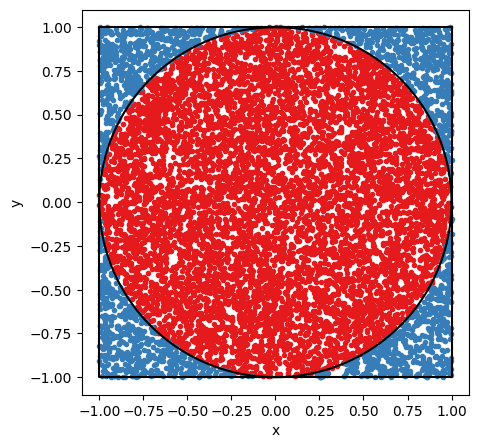


Pi is approximately 3.154

This is 0.3949% off the true value.



In [28]:
MonteCarloPi(10000)

#### 1.2 Leibniz formula for $\pi$


$$\pi/4 = \arctan(1) = \sum_{k=0}^{+\infty} \frac{(-1)^k}{2k + 1}$$

In [35]:
n = 10000000
k = np.arange(n)
pi_approx = 4*np.sum((-1)**k/(2*k + 1))
print(pi_approx)

3.1415925535897977


### 2. Eigenvalues of a special matrix

In [2]:
N = 1000
x = np.linspace(0,1,N+1)
dx = x[1]-x[0]

main_diag = -2*np.ones(N-1)
off_diag = np.ones(N-2)
derivative_matrix = (np.diag(main_diag) + np.diag(off_diag, k=1)+ np.diag(off_diag, k=-1))/dx**2
LHS_matrix = derivative_matrix

In [41]:
w, v = np.linalg.eigh(LHS_matrix)

In [45]:
w[-2]

-39.47828772622136

In [46]:
-4*np.pi**2

-39.47841760435743

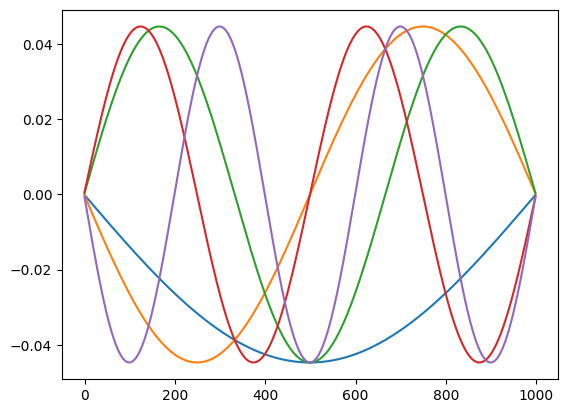

In [4]:
for i in range(1,6):
    plt.plot(v[:,-i])